<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/da14_apt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab에서 한글 폰트 사용하기

## Step 1. Colab 가상머신에 한글 폰트 설치

In [1]:
# Colab Jupyter Notebook에서 리눅스 명령어를 실행
!sudo apt-get install -y fonts-nanum    # sudo : 관리자 권한을 가져옴. -y : 전부다 허용 font-nanum : 나눔 폰트 설치
!sudo fc-cache -fv  # fc-cache : 캐쉬 데이터 관련 작업 진행
!rm ~/.cache/matplotlib -rf # rm : 삭제 -rf: 하위 폴더 전부

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and direc

## Step 2. Colab Runtime 재시작(Ctrl + M)

## Step 3. `matplotlib.pyplot` 모듈에서 한글 폰트를 사용할 수 있도록 설정.

In [1]:
import matplotlib.pyplot as plt

# matplotlib.pyplot 모듈에서 사용할 폰트 패밀리 한글로 설정
plt.rc('font', family='NanumBarunGothic')

한글 폰트 테스트

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.DataFrame(data={
    '구':['서초구', '강남구', '송파구'],
    '가격':[9_000, 10_000, 8_500]
})

In [4]:
df

,구,가격
0,서초구,9000
1,강남구,10000
2,송파구,8500


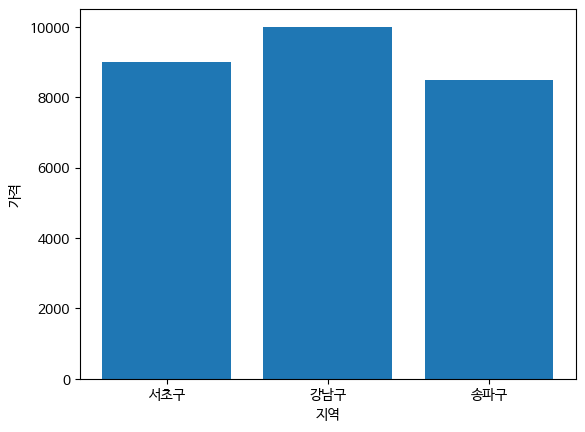

In [5]:
plt.bar(x=df['구'], height=df['가격'])
plt.xlabel('지역')
plt.ylabel('가격')
plt.show()

# 아파트 실거래가 데이터 분석


*   [apt_202504.csv](https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/apt_202504.csv) 파일을 읽고 DataFrame 생성
    *   첫 15줄은 파일 설명 문서 -> skip
    *   encoding 파라미터 설정(한글 인코딩: euc-kr)
    *   '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        *   '가격' 컬럼은 숫자 타입이어야 함!
*   데이터 프레임 파악
    *   info, head, tail, describe, dtypes, ...
*   '시군구' 컬럼의 값을 이용해서, province 파생 변수(광역시도)를 만듦.
    *   '인천광역시 부평구 부평동' -> '인천광역시'
    *   '충청남도 천안시 서북구' -> '충청남도'
*   '시군구' 컬럼의 값을 이용해서, county 파생 변수(시/군/구)를 만듦.
    *   '인천광역시 부평구 부평동' -> '부평구'
    *   '충청남도 천안시 서북구' -> '천안시'
*   '계약년월' 컬럼의 값을 이용해서, year(계약년도), month(계약월) 파생 변수 만듦.
    *   201910 -> 2019, 10
*    서울특별시 아파트들의 구별 아파트 가격의 개수, 평균, 최솟값, 최댓값
*    도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 구별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    *   결과를 평균의 내림차순으로 정렬해서 출력
    *   결과를 최댓값의 내림차순으로 정렬해서 출력
    *   결과를 최솟값의 오름차순으로 정렬해서 출력

## 데이터프레임 생성

In [6]:
# path
apt_path = "https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/apt_202504.csv"

In [7]:
# make df
apt = pd.read_csv(apt_path,
                  encoding='euc-kr',        # encoding : 파일 인코딩 타입 설정
                  skiprows=15,              # skiprows : 파일에서 몇 줄을 생략할 지 설정.
                  thousands=',',            # thousands : 숫자에서 천자리 구분자로 사용된 문자.
                  na_values='-')            # na_values : NA(null)로 취급할 문자열. 기본값 이외에 취급할 문자. '-'만 있으면 nan으로 값 변

In [8]:
apt.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,NaN,3,개인,개인,1983,길주남로90번길 45,NaN,중개거래,인천 부평구,NaN
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,NaN,23,개인,개인,2023,인하로222번길 20,NaN,중개거래,인천 미추홀구,NaN
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,NaN,22,개인,개인,2021,염전로 414,NaN,중개거래,인천 미추홀구,NaN
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,NaN,직거래,NaN,25.04.30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,NaN,20,개인,개인,1997,제기로 131,NaN,중개거래,서울 동대문구,NaN


In [9]:
apt.tail()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
36969,36970,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9921,202504,1,69000,NaN,27,개인,개인,2020,해양5로 17,NaN,중개거래,"경기 시흥시, 경기 안산시 상록구",NaN
36970,36971,경기도 안산시 상록구 사동,1639,1639,0,그랑시티자이2차,84.9712,202504,1,68000,NaN,5,개인,개인,2020,해양5로 17,NaN,중개거래,"경기 안산시 상록구, 서울 구로구",NaN
36971,36972,경기도 안산시 상록구 사동,1506,1506,0,본오,38.1300,202504,1,12400,NaN,4,개인,개인,1992,선진로 108,NaN,중개거래,경기 안산시 상록구,NaN
36972,36973,경기도 성남시 분당구 야탑동,156,156,0,목련마을(영남),84.9300,202504,1,86500,NaN,12,개인,개인,1995,판교로 669,NaN,중개거래,경기 성남시 분당구,NaN
36973,36974,울산광역시 동구 전하동,682-1,682,1,삼전아이필하모니,84.5300,202504,1,21500,NaN,15,개인,개인,2006,방어진순환도로 733,NaN,중개거래,울산 동구,NaN


In [10]:
apt.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,해제사유발생일
count,36974.000000,36974.000000,36974.000000,36974.000000,36974.0,36974.000000,3.697400e+04,36974.000000,36974.000000,1.191000e+03
mean,18487.500000,820.122951,3.142587,73.912814,202504.0,14.394088,4.348493e+04,10.057040,2006.137664,2.025043e+07
std,10673.618763,710.453648,38.857493,22.468251,0.0,8.364038,4.163910e+04,6.925089,10.891869,3.079995e+01
min,1.000000,0.000000,0.000000,12.210000,202504.0,1.000000,1.200000e+03,-2.000000,1962.000000,2.025040e+07
25%,9244.250000,366.000000,0.000000,59.840000,202504.0,7.000000,1.820000e+04,5.000000,1997.000000,2.025041e+07
50%,18487.500000,703.000000,0.000000,75.532800,202504.0,14.000000,3.370000e+04,9.000000,2006.000000,2.025042e+07
75%,27730.750000,1080.000000,1.000000,84.950000,202504.0,21.000000,5.550000e+04,14.000000,2017.000000,2.025043e+07
max,36974.000000,7346.000000,5001.000000,244.470000,202504.0,30.000000,1.050000e+06,79.000000,2025.000000,2.025051e+07


In [11]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36974 entries, 0 to 36973
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NO        36974 non-null  int64  
 1   시군구       36974 non-null  object 
 2   번지        36973 non-null  object 
 3   본번        36974 non-null  int64  
 4   부번        36974 non-null  int64  
 5   단지명       36974 non-null  object 
 6   전용면적(㎡)   36974 non-null  float64
 7   계약년월      36974 non-null  int64  
 8   계약일       36974 non-null  int64  
 9   거래금액(만원)  36974 non-null  int64  
 10  동         5074 non-null   object 
 11  층         36974 non-null  int64  
 12  매수자       36974 non-null  object 
 13  매도자       36974 non-null  object 
 14  건축년도      36974 non-null  int64  
 15  도로명       36974 non-null  object 
 16  해제사유발생일   1191 non-null   float64
 17  거래유형      36974 non-null  object 
 18  중개사소재지    33763 non-null  object 
 19  등기일자      5659 non-null   object 
dtypes: float64(2), int64(8), obj

In [12]:
# 가격 컬럼 숫자 타입 변환
# apt['거래금액(만원)']=apt['거래금액(만원)'].str.split(',').str.join('').astype(int)

In [13]:
apt['거래금액(만원)'].info()        # int

<class 'pandas.core.series.Series'>
RangeIndex: 36974 entries, 0 to 36973
Series name: 거래금액(만원)
Non-Null Count  Dtype
--------------  -----
36974 non-null  int64
dtypes: int64(1)
memory usage: 289.0 KB


In [14]:
apt['해제사유발생일'].unique()

array([      nan, 20250430., 20250507., 20250501., 20250506., 20250502.,
       20250504., 20250429., 20250508., 20250505., 20250428., 20250425.,
       20250426., 20250424., 20250503., 20250422., 20250423., 20250421.,
       20250420., 20250427., 20250419., 20250418., 20250417., 20250416.,
       20250415., 20250414., 20250413., 20250412., 20250411., 20250410.,
       20250409., 20250408., 20250407., 20250406., 20250405., 20250404.,
       20250403., 20250402., 20250401.])

In [15]:
apt['등기일자'].unique()

array([nan, '25.04.30', '25.05.01', '25.05.02', '25.04.29', '25.04.28',
       '25.04.25', '25.04.24', '25.04.23', '25.04.22', '25.04.21',
       '25.04.18', '25.04.17', '25.04.16', '25.04.15', '25.04.14',
       '25.04.11', '25.04.10', '25.04.09', '25.04.08', '25.04.07',
       '25.04.04', '25.04.03', '25.04.02', '25.04.01'], dtype=object)

In [16]:
# 해제사유발생일 컬럼의 값들을 날짜 타입으로 변환.
apt['해제사유발생일'] = pd.to_datetime(apt['해제사유발생일'], format='%Y%m%d')

In [17]:
apt['해제사유발생일'].unique()  # datetime을 저장하고 있는 배열

<DatetimeArray>
[                'NaT', '2025-04-30 00:00:00', '2025-05-07 00:00:00',
 '2025-05-01 00:00:00', '2025-05-06 00:00:00', '2025-05-02 00:00:00',
 '2025-05-04 00:00:00', '2025-04-29 00:00:00', '2025-05-08 00:00:00',
 '2025-05-05 00:00:00', '2025-04-28 00:00:00', '2025-04-25 00:00:00',
 '2025-04-26 00:00:00', '2025-04-24 00:00:00', '2025-05-03 00:00:00',
 '2025-04-22 00:00:00', '2025-04-23 00:00:00', '2025-04-21 00:00:00',
 '2025-04-20 00:00:00', '2025-04-27 00:00:00', '2025-04-19 00:00:00',
 '2025-04-18 00:00:00', '2025-04-17 00:00:00', '2025-04-16 00:00:00',
 '2025-04-15 00:00:00', '2025-04-14 00:00:00', '2025-04-13 00:00:00',
 '2025-04-12 00:00:00', '2025-04-11 00:00:00', '2025-04-10 00:00:00',
 '2025-04-09 00:00:00', '2025-04-08 00:00:00', '2025-04-07 00:00:00',
 '2025-04-06 00:00:00', '2025-04-05 00:00:00', '2025-04-04 00:00:00',
 '2025-04-03 00:00:00', '2025-04-02 00:00:00', '2025-04-01 00:00:00']
Length: 39, dtype: datetime64[ns]

In [18]:
# 등기일자 컬럼의 값들을 날짜 타입으로 변환.
apt['등기일자'] = pd.to_datetime(apt['등기일자'], format='%y.%m.%d')

In [19]:
apt['등기일자'].unique()

<DatetimeArray>
[                'NaT', '2025-04-30 00:00:00', '2025-05-01 00:00:00',
 '2025-05-02 00:00:00', '2025-04-29 00:00:00', '2025-04-28 00:00:00',
 '2025-04-25 00:00:00', '2025-04-24 00:00:00', '2025-04-23 00:00:00',
 '2025-04-22 00:00:00', '2025-04-21 00:00:00', '2025-04-18 00:00:00',
 '2025-04-17 00:00:00', '2025-04-16 00:00:00', '2025-04-15 00:00:00',
 '2025-04-14 00:00:00', '2025-04-11 00:00:00', '2025-04-10 00:00:00',
 '2025-04-09 00:00:00', '2025-04-08 00:00:00', '2025-04-07 00:00:00',
 '2025-04-04 00:00:00', '2025-04-03 00:00:00', '2025-04-02 00:00:00',
 '2025-04-01 00:00:00']
Length: 25, dtype: datetime64[ns]

In [20]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36974 entries, 0 to 36973
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   NO        36974 non-null  int64         
 1   시군구       36974 non-null  object        
 2   번지        36973 non-null  object        
 3   본번        36974 non-null  int64         
 4   부번        36974 non-null  int64         
 5   단지명       36974 non-null  object        
 6   전용면적(㎡)   36974 non-null  float64       
 7   계약년월      36974 non-null  int64         
 8   계약일       36974 non-null  int64         
 9   거래금액(만원)  36974 non-null  int64         
 10  동         5074 non-null   object        
 11  층         36974 non-null  int64         
 12  매수자       36974 non-null  object        
 13  매도자       36974 non-null  object        
 14  건축년도      36974 non-null  int64         
 15  도로명       36974 non-null  object        
 16  해제사유발생일   1191 non-null   datetime64[ns]
 17  거래유형      36

In [21]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,NaN,3,개인,개인,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,NaN,23,개인,개인,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,NaN,22,개인,개인,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,NaN,20,개인,개인,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT


In [22]:
apt.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,해제사유발생일,등기일자
count,36974.000000,36974.000000,36974.000000,36974.000000,36974.0,36974.000000,3.697400e+04,36974.000000,36974.000000,1191,5659
mean,18487.500000,820.122951,3.142587,73.912814,202504.0,14.394088,4.348493e+04,10.057040,2006.137664,2025-04-19 17:06:29.924433152,2025-04-21 06:25:30.588443392
min,1.000000,0.000000,0.000000,12.210000,202504.0,1.000000,1.200000e+03,-2.000000,1962.000000,2025-04-01 00:00:00,2025-04-01 00:00:00
25%,9244.250000,366.000000,0.000000,59.840000,202504.0,7.000000,1.820000e+04,5.000000,1997.000000,2025-04-13 00:00:00,2025-04-15 00:00:00
50%,18487.500000,703.000000,0.000000,75.532800,202504.0,14.000000,3.370000e+04,9.000000,2006.000000,2025-04-19 00:00:00,2025-04-23 00:00:00
75%,27730.750000,1080.000000,1.000000,84.950000,202504.0,21.000000,5.550000e+04,14.000000,2017.000000,2025-04-28 00:00:00,2025-04-29 00:00:00
max,36974.000000,7346.000000,5001.000000,244.470000,202504.0,30.000000,1.050000e+06,79.000000,2025.000000,2025-05-08 00:00:00,2025-05-02 00:00:00
std,10673.618763,710.453648,38.857493,22.468251,0.0,8.364038,4.163910e+04,6.925089,10.891869,NaN,NaN


In [23]:
# 컬럼 이름 바꾸기
apt.rename(columns={'전용면적(㎡)' : '전용면적', '거래금액(만원)' : '거래금액'}, inplace=True)

In [24]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액,동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,NaN,3,개인,개인,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,NaN,23,개인,개인,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,NaN,22,개인,개인,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,NaN,20,개인,개인,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT


In [25]:
apt.columns

Index(['NO', '시군구', '번지', '본번', '부번', '단지명', '전용면적', '계약년월', '계약일', '거래금액',
       '동', '층', '매수자', '매도자', '건축년도', '도로명', '해제사유발생일', '거래유형', '중개사소재지',
       '등기일자'],
      dtype='object')

## read_csv

In [26]:
apt = pd.read_csv(apt_path,
                  encoding = 'euc-kr',
                  skiprows=15,
                  na_values='-',
                  parse_dates=['해제사유발생일', '등기일자'],   # 해당 컬럼은 날짜로 해석해주세요.
                  date_format ={'해제사유발생일':'%Y%m%d', '등기일자':'%y.%m.%d'},
                  thousands = ',')
# parse_dates 파라미터 : 날짜 포맷으로 해석(parse)할 컬럼(들)의 리스트.
# date_format 파라미터 : {'컬럼이름': '날짜포맷', ...}

In [27]:
apt['해제사유발생일'].unique()

<DatetimeArray>
[                'NaT', '2025-04-30 00:00:00', '2025-05-07 00:00:00',
 '2025-05-01 00:00:00', '2025-05-06 00:00:00', '2025-05-02 00:00:00',
 '2025-05-04 00:00:00', '2025-04-29 00:00:00', '2025-05-08 00:00:00',
 '2025-05-05 00:00:00', '2025-04-28 00:00:00', '2025-04-25 00:00:00',
 '2025-04-26 00:00:00', '2025-04-24 00:00:00', '2025-05-03 00:00:00',
 '2025-04-22 00:00:00', '2025-04-23 00:00:00', '2025-04-21 00:00:00',
 '2025-04-20 00:00:00', '2025-04-27 00:00:00', '2025-04-19 00:00:00',
 '2025-04-18 00:00:00', '2025-04-17 00:00:00', '2025-04-16 00:00:00',
 '2025-04-15 00:00:00', '2025-04-14 00:00:00', '2025-04-13 00:00:00',
 '2025-04-12 00:00:00', '2025-04-11 00:00:00', '2025-04-10 00:00:00',
 '2025-04-09 00:00:00', '2025-04-08 00:00:00', '2025-04-07 00:00:00',
 '2025-04-06 00:00:00', '2025-04-05 00:00:00', '2025-04-04 00:00:00',
 '2025-04-03 00:00:00', '2025-04-02 00:00:00', '2025-04-01 00:00:00']
Length: 39, dtype: datetime64[ns]

In [28]:
apt['등기일자'].unique()

<DatetimeArray>
[                'NaT', '2025-04-30 00:00:00', '2025-05-01 00:00:00',
 '2025-05-02 00:00:00', '2025-04-29 00:00:00', '2025-04-28 00:00:00',
 '2025-04-25 00:00:00', '2025-04-24 00:00:00', '2025-04-23 00:00:00',
 '2025-04-22 00:00:00', '2025-04-21 00:00:00', '2025-04-18 00:00:00',
 '2025-04-17 00:00:00', '2025-04-16 00:00:00', '2025-04-15 00:00:00',
 '2025-04-14 00:00:00', '2025-04-11 00:00:00', '2025-04-10 00:00:00',
 '2025-04-09 00:00:00', '2025-04-08 00:00:00', '2025-04-07 00:00:00',
 '2025-04-04 00:00:00', '2025-04-03 00:00:00', '2025-04-02 00:00:00',
 '2025-04-01 00:00:00']
Length: 25, dtype: datetime64[ns]

In [29]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36974 entries, 0 to 36973
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   NO        36974 non-null  int64         
 1   시군구       36974 non-null  object        
 2   번지        36973 non-null  object        
 3   본번        36974 non-null  int64         
 4   부번        36974 non-null  int64         
 5   단지명       36974 non-null  object        
 6   전용면적(㎡)   36974 non-null  float64       
 7   계약년월      36974 non-null  int64         
 8   계약일       36974 non-null  int64         
 9   거래금액(만원)  36974 non-null  int64         
 10  동         5074 non-null   object        
 11  층         36974 non-null  int64         
 12  매수자       36974 non-null  object        
 13  매도자       36974 non-null  object        
 14  건축년도      36974 non-null  int64         
 15  도로명       36974 non-null  object        
 16  해제사유발생일   1191 non-null   datetime64[ns]
 17  거래유형      36

In [30]:
# pd.DataFrame.rename(index={'old_row_label': 'new_row_label', ...}) : 인덱스 이름 변경
# pd.DataFrame.rename(columns={'old_column_name': 'new_column_name'}, ...)  : 컬럼 이름 변경
apt.rename(columns={'전용면적(㎡)': '전용면적'}, inplace=True)

In [31]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,NaN,3,개인,개인,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,NaN,23,개인,개인,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,NaN,22,개인,개인,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,2,15,개인,개인,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,NaN,20,개인,개인,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT


## 데이터 탐색

In [32]:
apt.describe()

,NO,본번,부번,전용면적,계약년월,계약일,거래금액(만원),층,건축년도,해제사유발생일,등기일자
count,36974.000000,36974.000000,36974.000000,36974.000000,36974.0,36974.000000,3.697400e+04,36974.000000,36974.000000,1191,5659
mean,18487.500000,820.122951,3.142587,73.912814,202504.0,14.394088,4.348493e+04,10.057040,2006.137664,2025-04-19 17:06:29.924433152,2025-04-21 06:25:30.588443392
min,1.000000,0.000000,0.000000,12.210000,202504.0,1.000000,1.200000e+03,-2.000000,1962.000000,2025-04-01 00:00:00,2025-04-01 00:00:00
25%,9244.250000,366.000000,0.000000,59.840000,202504.0,7.000000,1.820000e+04,5.000000,1997.000000,2025-04-13 00:00:00,2025-04-15 00:00:00
50%,18487.500000,703.000000,0.000000,75.532800,202504.0,14.000000,3.370000e+04,9.000000,2006.000000,2025-04-19 00:00:00,2025-04-23 00:00:00
75%,27730.750000,1080.000000,1.000000,84.950000,202504.0,21.000000,5.550000e+04,14.000000,2017.000000,2025-04-28 00:00:00,2025-04-29 00:00:00
max,36974.000000,7346.000000,5001.000000,244.470000,202504.0,30.000000,1.050000e+06,79.000000,2025.000000,2025-05-08 00:00:00,2025-05-02 00:00:00
std,10673.618763,710.453648,38.857493,22.468251,0.0,8.364038,4.163910e+04,6.925089,10.891869,NaN,NaN


In [33]:
# 거래 금액 최솟값, 최댓값인 행
apt[(apt['거래금액(만원)'] == apt['거래금액(만원)'].min()) | (apt['거래금액(만원)'] == apt['거래금액(만원)'].max())]

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
7430,7431,서울특별시 강남구 압구정동,369-1,369,1,"현대2차(10,11,20,23,24,25동)",198.41,202504,23,1050000,NaN,9,개인,개인,1976,압구정로29길 71,NaT,중개거래,서울 강남구,NaT
7698,7699,전라남도 고흥군 도화면 당오리,487,487,0,뉴코아,22.68,202504,23,1200,NaN,3,개인,개인,1997,동신길 70,NaT,직거래,NaN,NaT
9811,9812,전라남도 고흥군 도화면 당오리,487,487,0,뉴코아,22.68,202504,21,1200,NaN,3,개인,개인,1997,동신길 70,NaT,직거래,NaN,2025-04-29


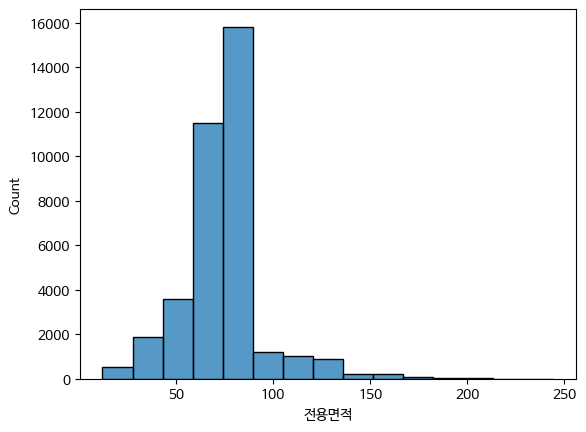

In [34]:
# 전용면적 히스토그램
sns.histplot(data=apt, x='전용면적', bins=15)
plt.show()

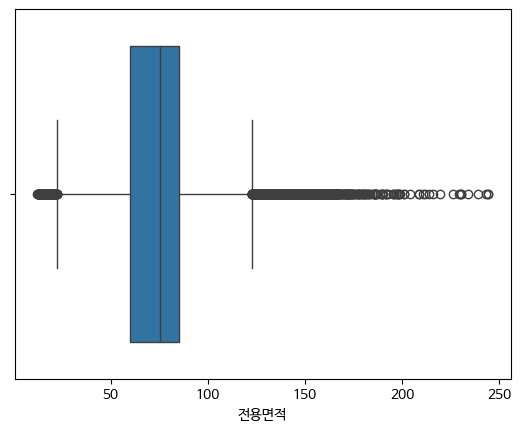

In [35]:
# 전용면적 box plot
sns.boxplot(data=apt, x='전용면적')
plt.show()

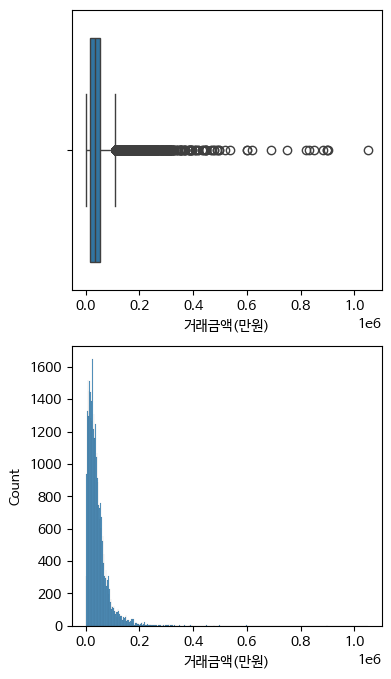

In [36]:
# 거래금액
fig, axes = plt.subplots(nrows=2, figsize=(4,8))

sns.boxplot(data=apt, x='거래금액(만원)', ax=axes[0])
sns.histplot(data=apt, x='거래금액(만원)')

plt.show()

## '시군구' 컬럼의 값을 이용해서, province 파생 변수(광역시도)를 만듦.
    * '인천광역시 부평구 부평동' -> '인천광역시'
    * '충청남도 천안시 서북구' -> '충청남도'

In [37]:
# 시군구
apt['province'] = apt['시군구'].str.split().str[0]

## '시군구'컬럼의 값을 이용해서, country 파생 변수(시/군/구)를 만듦.
    * '인천광역시 부평구 부평동' -> '부평구'
    * '충청남도 천안시 서북구' -> '천안시'

In [38]:
apt['country'] = apt['시군구'].str.split().str[1]

In [39]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),...,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,country
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,...,개인,개인,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT,인천광역시,부평구
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,...,개인,개인,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT,인천광역시,미추홀구
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,...,개인,개인,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT,인천광역시,미추홀구
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,개인,개인,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30,서울특별시,성동구
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,...,개인,개인,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT,서울특별시,동대문구


## '계약년월'컬럼의 값을 이용해서, year(계약년도), month(계약월) 파생 변수 만듦.
    * 202504 -> 2025(year), 4(month)

In [40]:
apt['year'] = apt['계약년월'].astype(str).str[:4]

In [41]:
apt['year'] = apt['계약년월'] // 100

In [42]:
apt['month'] = apt['계약년월'].astype(str).str[4:]

In [43]:
apt['month'] = apt['계약년월'] % 100

In [44]:
apt.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,country,year,month
0,1,인천광역시 부평구 부평동,140-6,140,6,신영(1동2동),48.0100,202504,30,17355,...,1983,길주남로90번길 45,NaT,중개거래,인천 부평구,NaT,인천광역시,부평구,2025,4
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,...,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT,인천광역시,미추홀구,2025,4
2,3,인천광역시 미추홀구 주안동,1628,1628,0,주안역센트레빌,59.9813,202504,30,41000,...,2021,염전로 414,NaT,중개거래,인천 미추홀구,NaT,인천광역시,미추홀구,2025,4
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30,서울특별시,성동구,2025,4
4,5,서울특별시 동대문구 청량리동,60,60,0,한신,114.9500,202504,30,86200,...,1997,제기로 131,NaT,중개거래,서울 동대문구,NaT,서울특별시,동대문구,2025,4


## 서울 아파트 실거래가 분석

In [45]:
seoul_df = apt[apt.province == '서울특별시']

In [46]:
seoul_df.province.unique()

array(['서울특별시'], dtype=object)

In [47]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4004 entries, 3 to 36633
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   NO        4004 non-null   int64         
 1   시군구       4004 non-null   object        
 2   번지        4004 non-null   object        
 3   본번        4004 non-null   int64         
 4   부번        4004 non-null   int64         
 5   단지명       4004 non-null   object        
 6   전용면적      4004 non-null   float64       
 7   계약년월      4004 non-null   int64         
 8   계약일       4004 non-null   int64         
 9   거래금액(만원)  4004 non-null   int64         
 10  동         142 non-null    object        
 11  층         4004 non-null   int64         
 12  매수자       4004 non-null   object        
 13  매도자       4004 non-null   object        
 14  건축년도      4004 non-null   int64         
 15  도로명       4004 non-null   object        
 16  해제사유발생일   134 non-null    datetime64[ns]
 17  거래유형      4004 non

## 서울 구별 거래 건수, 거래 금액 평균, 최댓값, 최솟값

In [127]:
seoul_df_county = seoul_df.groupby(by=['country'])['거래금액(만원)'].agg(['count', 'mean', 'max', 'min'])

In [112]:
seoul_by_county = seoul_df.pivot_table(values='거래금액(만원)', index='country', aggfunc=['count', 'mean', 'max', 'min'])
seoul_by_county

,count,mean,max,min
,거래금액(만원),거래금액(만원),거래금액(만원),거래금액(만원)
country,,,,
강남구,58,398812.068966,1050000,16000
강동구,237,112508.016878,233000,10200
강북구,77,67638.311688,112000,8500
강서구,242,84419.214876,201000,9500
관악구,150,79354.666667,125000,10300
광진구,116,128171.293103,317000,13900
구로구,208,70238.942308,165000,10700
금천구,47,62259.574468,115500,8900


In [122]:
# 거래 건수 내림차순 정렬,
seoul_by_county.sort_values(by=('min', '거래금액(만원)'), ascending=False)

,count,mean,max,min
,거래금액(만원),거래금액(만원),거래금액(만원),거래금액(만원)
country,,,,
용산구,18,173538.888889,443000,54000
성북구,252,83057.341270,185000,43000
양천구,259,147008.108108,345000,39000
서초구,12,198075.000000,490000,30000
노원구,308,59265.746753,144000,29500
송파구,76,169609.868421,407500,22200
마포구,253,141033.754941,279500,17000
강남구,58,398812.068966,1050000,16000


In [124]:
# 서울시 지역별 평균 거래 가격
seoul_df_county.sort_values(by='mean', ascending=False)

,count,mean,max,min
country,,,,
강남구,58,398812.068966,1050000,16000
서초구,12,198075.000000,490000,30000
용산구,18,173538.888889,443000,54000
송파구,76,169609.868421,407500,22200
성동구,253,151408.300395,900000,13000
양천구,259,147008.108108,345000,39000
마포구,253,141033.754941,279500,17000
영등포구,248,140505.447581,488200,9500
광진구,116,128171.293103,317000,13900


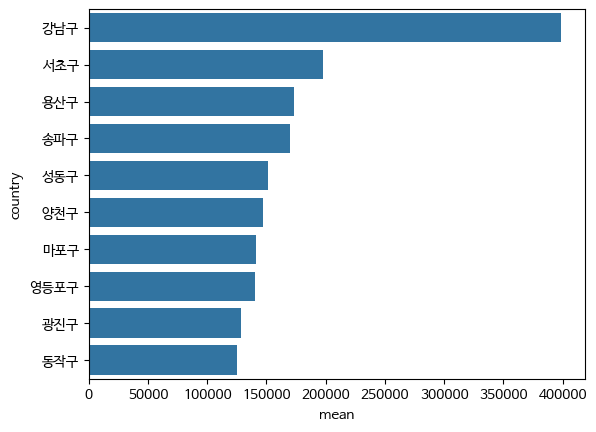

In [143]:
# 아파트 거래금액 평균 상위 10개
seoul_top10 = seoul_df_county.sort_values(by='mean', ascending=False).head(10)
sns.barplot(data=seoul_top10, x='mean', y='country')
plt.show()

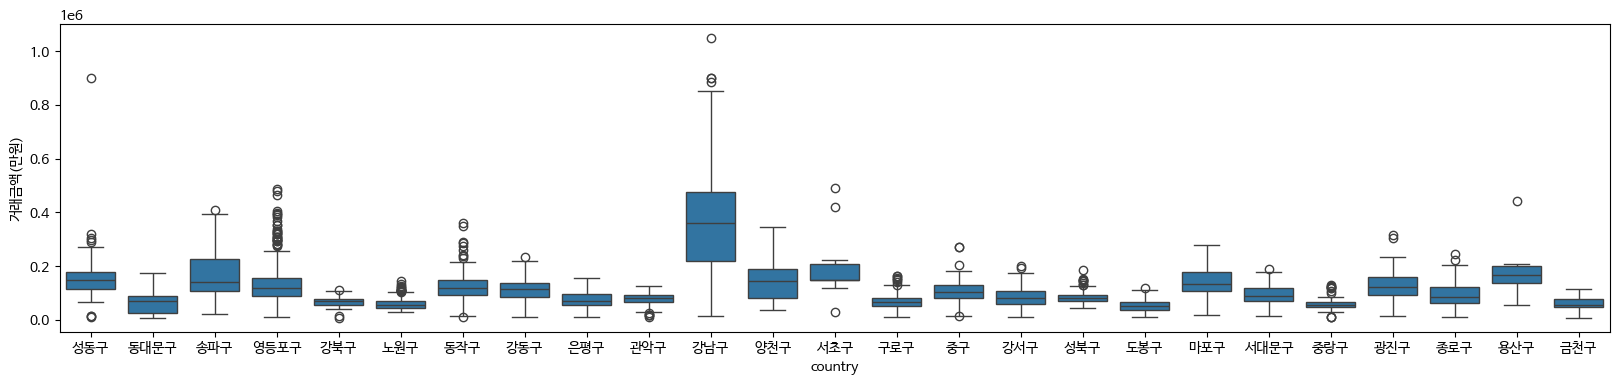

In [141]:
fig = plt.figure(figsize=(20, 4))
sns.boxplot(data=seoul_df, x='country', y='거래금액(만원)')
plt.show()

## 전용면적 $84 m^2$ ~ $100 m^2$ 미만인 서울 아파트 거래 금액 분석

In [145]:
seoul_mid_size_df = seoul_df[(seoul_df['전용면적'] >= 84) & (seoul_df['전용면적'] < 100)]
seoul_mid_size_df.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,country,year,month
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.930,202504,30,73850,...,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30,서울특별시,성동구,2025,4
7,8,서울특별시 송파구 잠실동,44,44,0,레이크팰리스,84.820,202504,30,262000,...,2006,잠실로 88,NaT,중개거래,"서울 광진구, 서울 송파구",NaT,서울특별시,송파구,2025,4
10,11,서울특별시 영등포구 당산동4가,98,98,0,브라운스톤당산,84.025,202504,30,122000,...,2015,영신로55길 8,NaT,중개거래,"서울 마포구, 서울 영등포구",2025-04-30,서울특별시,영등포구,2025,4
13,14,서울특별시 강북구 미아동,1353,1353,0,에스케이북한산시티,84.760,202504,30,72000,...,2004,솔샘로 174,NaT,중개거래,서울 강북구,NaT,서울특별시,강북구,2025,4
28,29,서울특별시 동작구 흑석동,339,339,0,흑석한강센트레빌Ⅱ,84.946,202504,30,172000,...,2012,서달로 91,NaT,중개거래,서울 동작구,NaT,서울특별시,동작구,2025,4


In [148]:
seoul_mid_size_by_county = seoul_mid_size_df.pivot_table(values='거래금액(만원)',
                                                         index='country',
                                                         aggfunc={'거래금액(만원)' : ['count', 'mean', 'max', 'min']})
seoul_mid_size_by_county

,count,max,mean,min
country,,,,
강남구,10,381000,273350.000000,140000
강동구,81,204000,121548.148148,59700
강북구,28,96750,74869.642857,44000
강서구,67,151000,103374.626866,48500
관악구,56,125000,89050.000000,50000
광진구,42,205000,140078.571429,58000
구로구,74,158000,79764.864865,45000
금천구,18,115500,73416.666667,48000
노원구,60,122000,79140.000000,49000


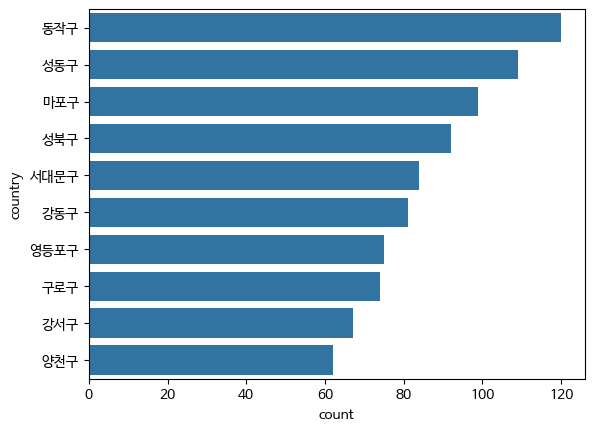

In [153]:
# 거래 건수 상위 10개 지역
seoul_top10 = seoul_mid_size_by_county.sort_values(by='count', ascending=False).head(10)
sns.barplot(data=seoul_top10, x='count', y='country')
plt.show()

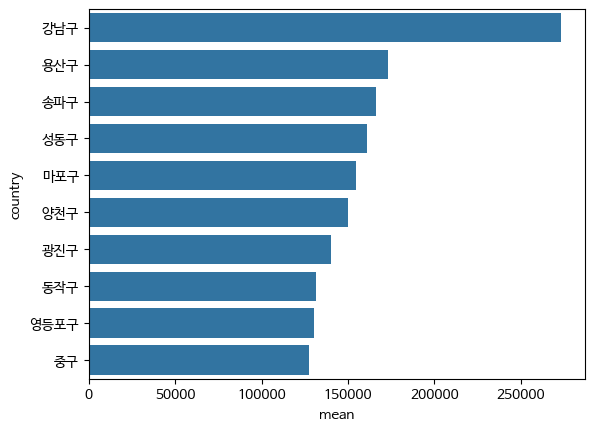

In [157]:
# 거래 금액 평균 상위 10개
seoul_top10 = seoul_mid_size_by_county.sort_values(by='mean', ascending=False).head(10)
sns.barplot(data=seoul_top10, x='mean', y='country')
plt.show()

## 전국 아파트 실거래가 분석

## 서울특별시 아파트들의 구별 아파트 가격의 개수, 평균, 최소값, 최댓값

In [49]:
# 서울특별시 데이터만 출력
seoul = apt[apt['province'] == '서울특별시']

In [53]:
seoul.columns

Index(['NO', '시군구', '번지', '본번', '부번', '단지명', '전용면적', '계약년월', '계약일', '거래금액(만원)',
       '동', '층', '매수자', '매도자', '건축년도', '도로명', '해제사유발생일', '거래유형', '중개사소재지',
       '등기일자', 'province', 'country', 'year', 'month'],
      dtype='object')

In [54]:
# 구별 아파트 가격의 개수
gu_count = seoul.groupby(by=['country'])['거래금액(만원)'].count()

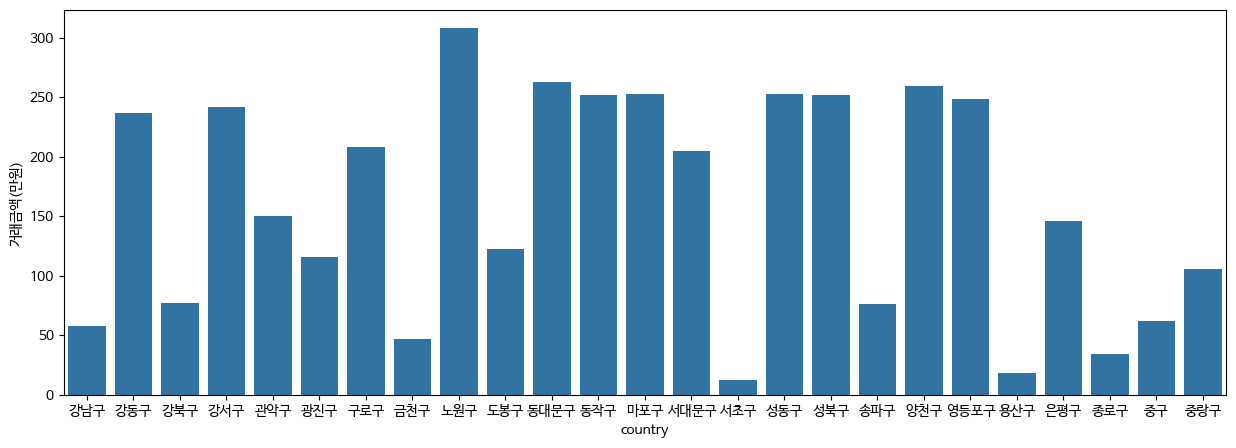

In [55]:
plt.figure(figsize=(15,5))
sns.barplot(data=gu_count)
plt.show()

In [56]:
# 구별 아파트 가격의 평균
gu_mean = seoul.groupby(by=['country'])['거래금액(만원)'].mean()

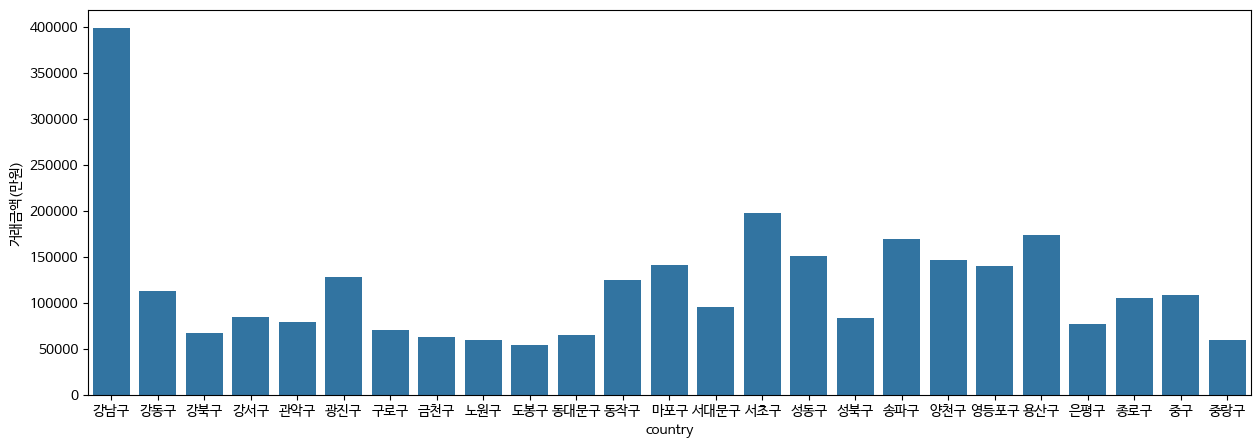

In [57]:
plt.figure(figsize=(15,5))
sns.barplot(gu_mean)
plt.show()

In [58]:
# 구별 아파트 가격의 최솟값
gu_min = seoul.groupby(by=['country'])['거래금액(만원)'].min()

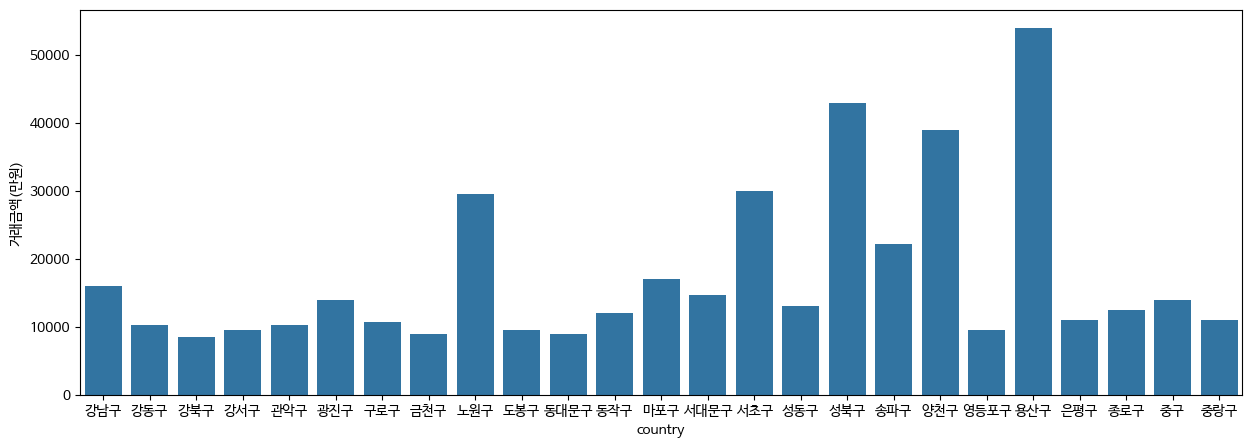

In [59]:
plt.figure(figsize=(15,5))
sns.barplot(data=gu_min)
plt.show()

In [60]:
# 구별 아파트 가격의 최댓값
gu_max = seoul.groupby(by=['country'])['거래금액(만원)'].max()

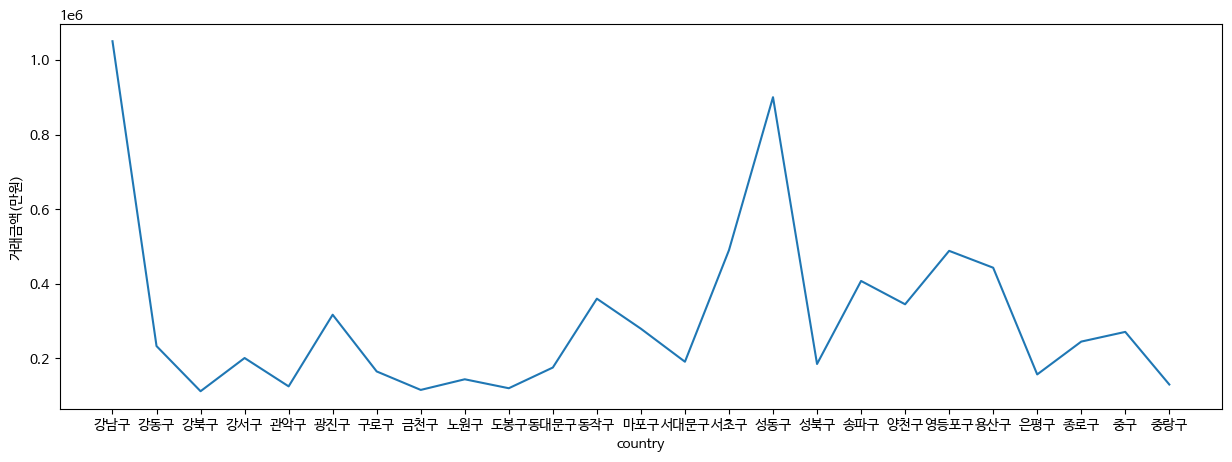

In [61]:
plt.figure(figsize=(15,5))
sns.lineplot(data=gu_max)
plt.show()

## 광역시도별 아파트 가격 개수, 평균, 최솟값, 최댓값

In [62]:
# 광역시도별 아파트 가격 개수
pro_count = apt.groupby(by=['province'])['거래금액(만원)'].count()

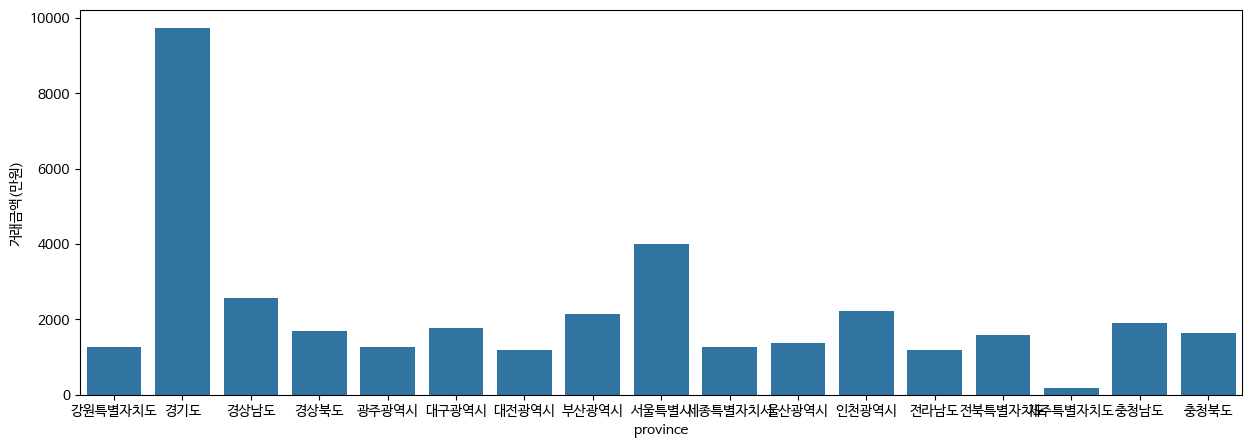

In [63]:
plt.figure(figsize=(15,5))
sns.barplot(pro_count)
plt.show()

In [64]:
# 광역시도별 아파트 가격 평균
pro_mean = apt.groupby(by=['province'])['거래금액(만원)'].mean()

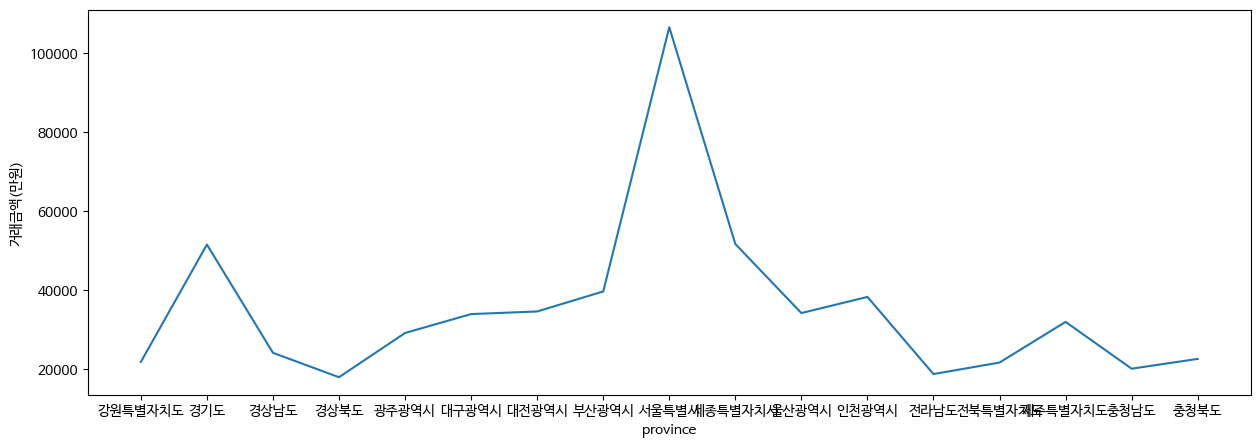

In [65]:
plt.figure(figsize=(15,5))
sns.lineplot(pro_mean)
plt.show()

In [66]:
# 광역시도별 아파트 가격 최솟값
pro_min = apt.groupby(by=['province'])['거래금액(만원)'].min()

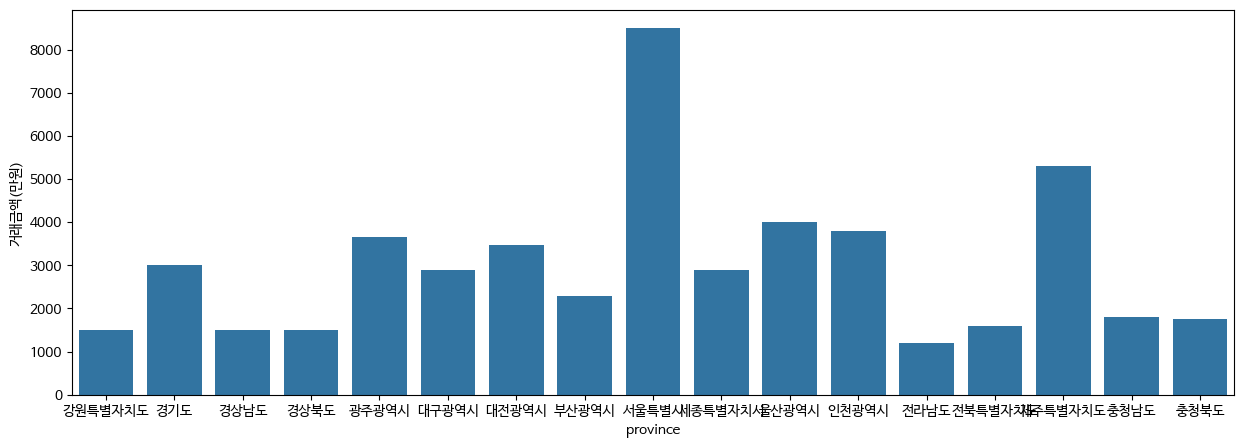

In [67]:
plt.figure(figsize=(15,5))
sns.barplot(pro_min)
plt.show()

In [68]:
# 광역시도별 아파트 가격 최댓값
pro_max = apt.groupby(by=['province'])['거래금액(만원)'].max()

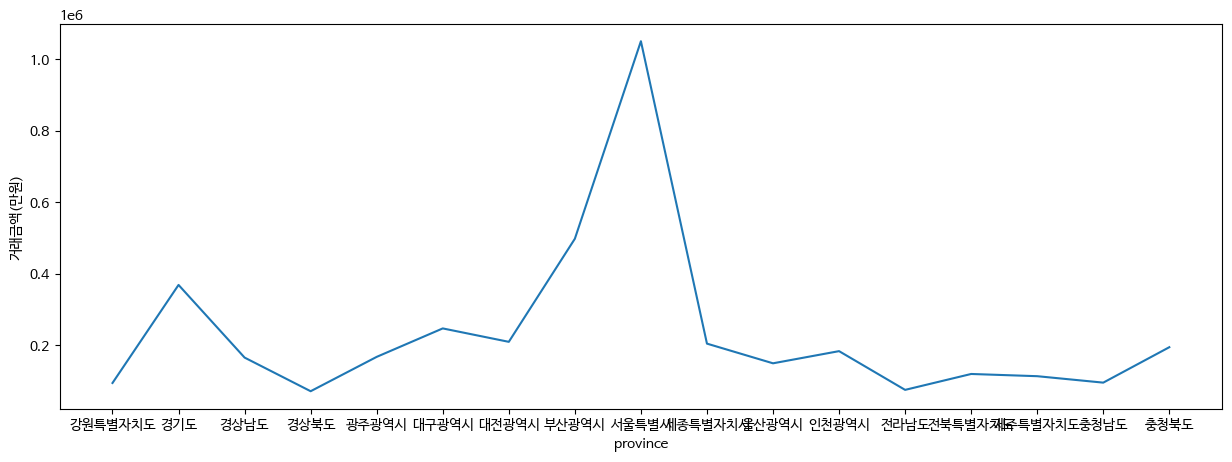

In [69]:
plt.figure(figsize=(15,5))
sns.lineplot(pro_max)
plt.show()

## 광역시도별 아파트 실거래가 분석

In [161]:
apt_by_province = apt.pivot_table(values='거래금액(만원)', index='province', aggfunc={'거래금액(만원)' : ['count', 'mean', 'max', 'min']})
apt_by_province

,count,max,mean,min
province,,,,
강원특별자치도,1273,95000,21880.036921,1500
경기도,9733,369000,51585.387342,3000
경상남도,2559,166000,24180.064088,1500
경상북도,1701,72000,18005.839506,1500
광주광역시,1266,168000,29210.827014,3650
대구광역시,1780,247500,33990.820787,2900
대전광역시,1182,210000,34653.980541,3480
부산광역시,2134,498000,39717.544049,2300
서울특별시,4004,1050000,106616.144106,8500


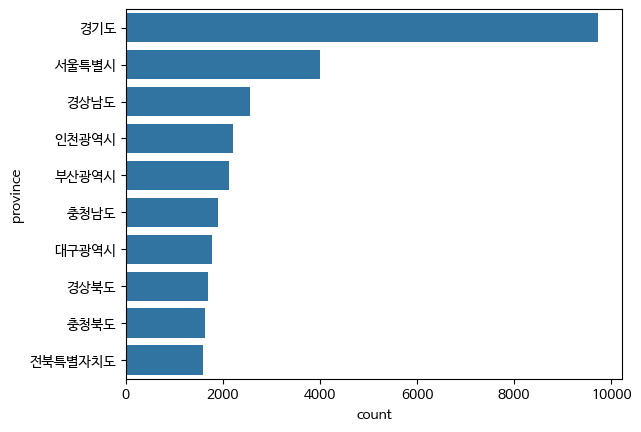

In [165]:
# 거래 건수 상위 10개 광역시도
top10 = apt_by_province.sort_values(by='count', ascending=False).head(10)
sns.barplot(data=top10, x='count', y='province')
plt.show()

## 거래금액 평균 상위 10개 지역

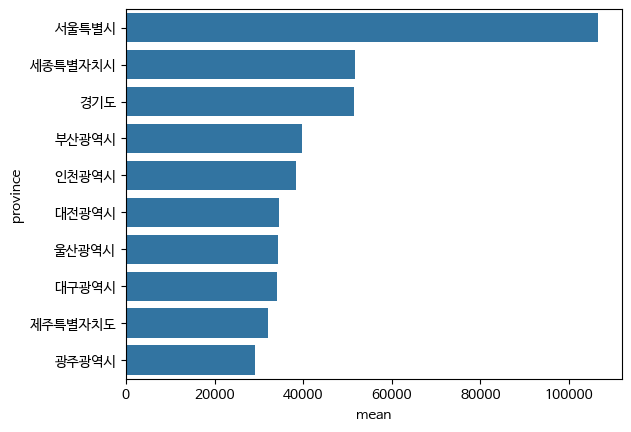

In [167]:
top10 = apt_by_province.sort_values(by='mean', ascending=False).head(n=10)
sns.barplot(data=top10, x='mean', y='province')
plt.show()

## 전용면적 $84 m^2$ 이상 $100 m^2$ 미만의 전국 광역시도별 아파트

In [169]:
mid_size = apt[(apt['전용면적'] >= 84) &
               (apt['전용면적'] < 100)]
mid_size.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,country,year,month
1,2,인천광역시 미추홀구 주안동,1662,1662,0,주안파크자이더플래티넘,84.9937,202504,30,57800,...,2023,인하로222번길 20,NaT,중개거래,인천 미추홀구,NaT,인천광역시,미추홀구,2025,4
3,4,서울특별시 성동구 마장동,784,784,0,세림,84.9300,202504,30,73850,...,1986,마장로42길 16,NaT,직거래,NaN,2025-04-30,서울특별시,성동구,2025,4
5,6,대구광역시 달서구 월성동,89,89,0,서한맨션,84.8100,202504,30,20000,...,1992,학산로 15,NaT,중개거래,대구 달서구,NaT,대구광역시,달서구,2025,4
7,8,서울특별시 송파구 잠실동,44,44,0,레이크팰리스,84.8200,202504,30,262000,...,2006,잠실로 88,NaT,중개거래,"서울 광진구, 서울 송파구",NaT,서울특별시,송파구,2025,4
9,10,부산광역시 북구 만덕동,962,962,0,이편한세상금정산,84.9378,202504,30,46200,...,2021,상학로 36,NaT,중개거래,부산 북구,NaT,부산광역시,북구,2025,4


In [170]:
mid_size_by_province = mid_size.pivot_table(values='거래금액(만원)', index='province', aggfunc={'거래금액(만원)' : ['count', 'mean', 'max', 'min']})
mid_size_by_province

,count,max,mean,min
province,,,,
강원특별자치도,450,75000,30231.482222,5000
경기도,3636,253000,57321.139164,12000
경상남도,1003,98000,30878.494516,4700
경상북도,594,58500,25667.686869,3500
광주광역시,545,84000,35489.587156,9309
대구광역시,813,155000,40417.328413,12000
대전광역시,458,111000,42061.058952,13000
부산광역시,743,145000,48326.880215,10000
서울특별시,1307,381000,117148.783474,44000


## 광역시도별 거래건수 상위 10개

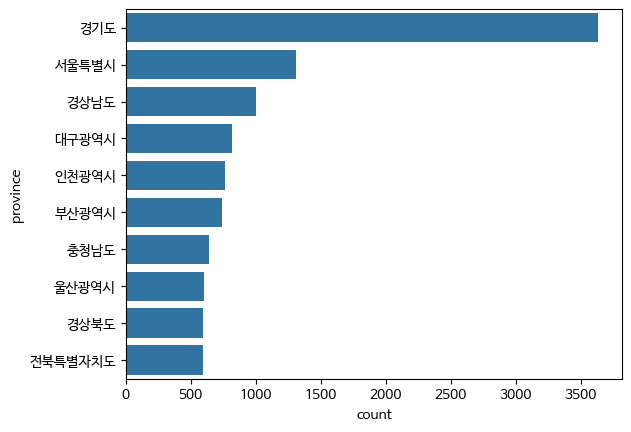

In [172]:
top10 = mid_size_by_province.sort_values(by='count', ascending=False).head(n=10)
sns.barplot(data=top10, x='count', y='province')
plt.show()

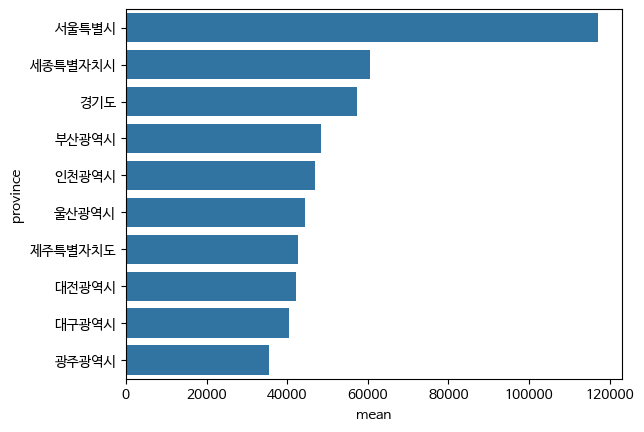

In [174]:
# 광역시도별 거래금액 평균 상위 10개
top10 = mid_size_by_province.sort_values(by='mean', ascending=False).head(n=10)
sns.barplot(data=top10, x='mean', y='province')
plt.show()

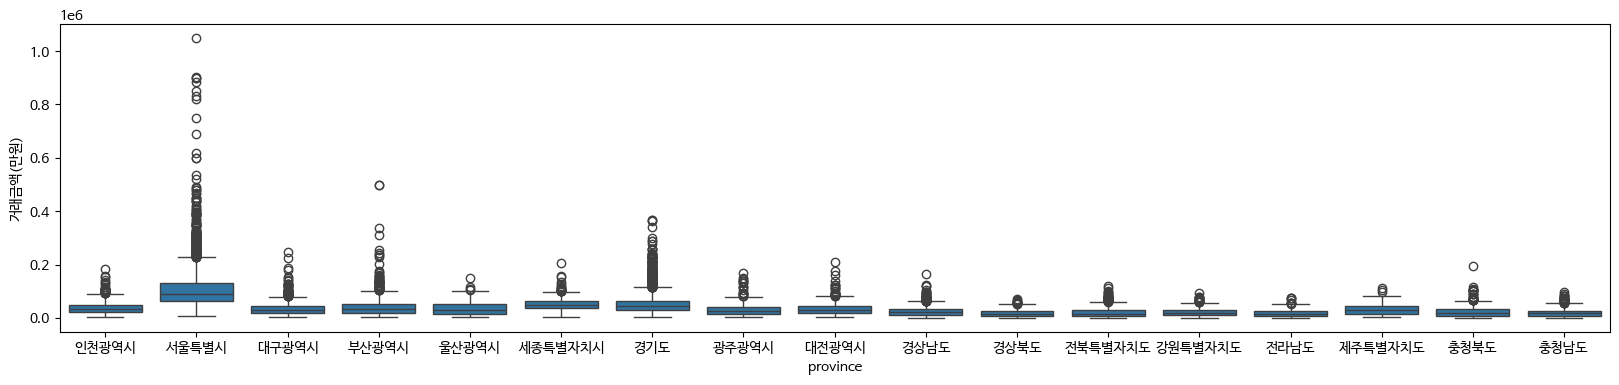

In [175]:
fig = plt.figure(figsize=(20, 4))
sns.boxplot(data=apt, x='province', y='거래금액(만원)')
plt.show()

## 면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 구별 아파트 가격 개수, 평균, 최솟값, 최댓값

In [70]:
# 면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 구하기
goal_df = apt[(apt['province'] == '서울특별시') & (apt['전용면적'] >= 84) & (apt['전용면적'] < 100)]

In [72]:
# 구별 아파트 가격 개수
goal_count = goal_df.groupby(by=['country'])['거래금액(만원)'].count()

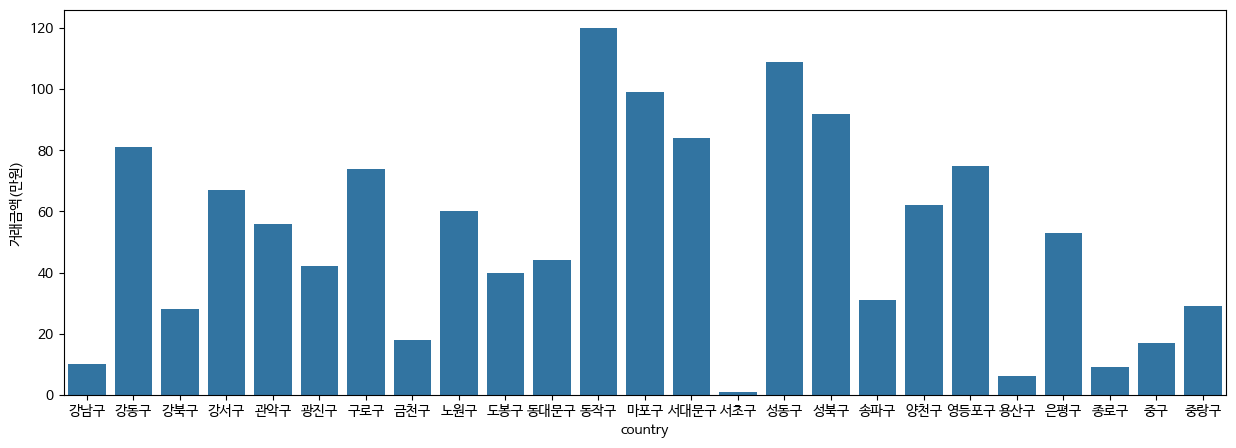

In [73]:
plt.figure(figsize=(15,5))
sns.barplot(goal_count)
plt.show()

In [74]:
# 구별 아파트 가격 평균
goal_mean = goal_df.groupby(by=['country'])['거래금액(만원)'].mean()

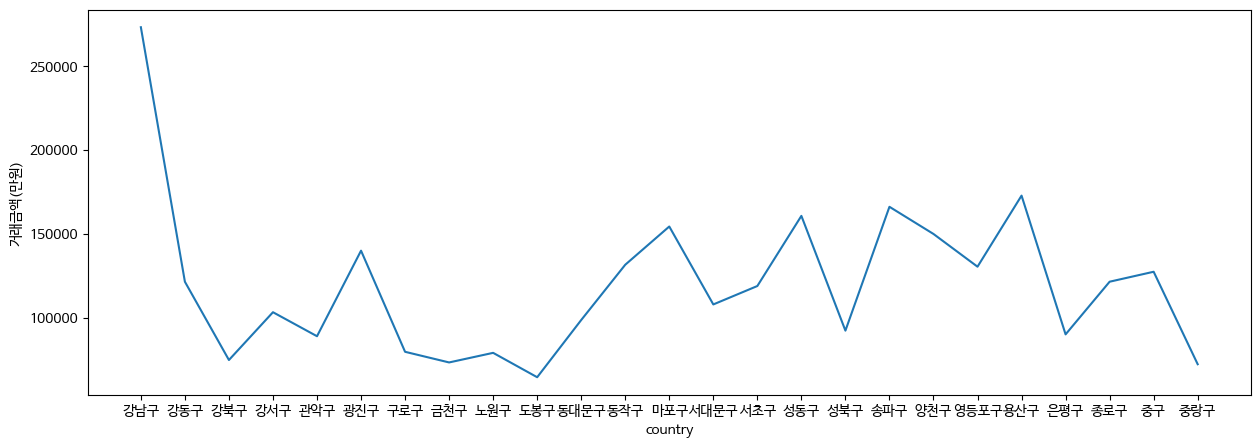

In [75]:
plt.figure(figsize=(15,5))
sns.lineplot(goal_mean)
plt.show()

In [77]:
# 구별 아파트 가격 최솟값
goal_min = goal_df.groupby(by=['country'])['거래금액(만원)'].min()

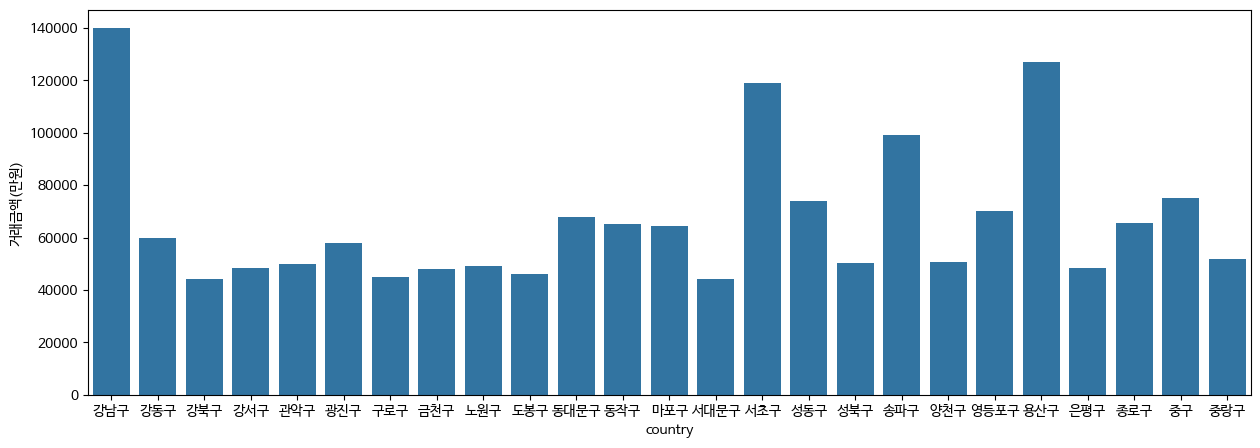

In [78]:
plt.figure(figsize=(15,5))
sns.barplot(goal_min)
plt.show()

In [79]:
# 구별 아파트 가격 최댓값
goal_max = goal_df.groupby(by=['country'])['거래금액(만원)'].max()

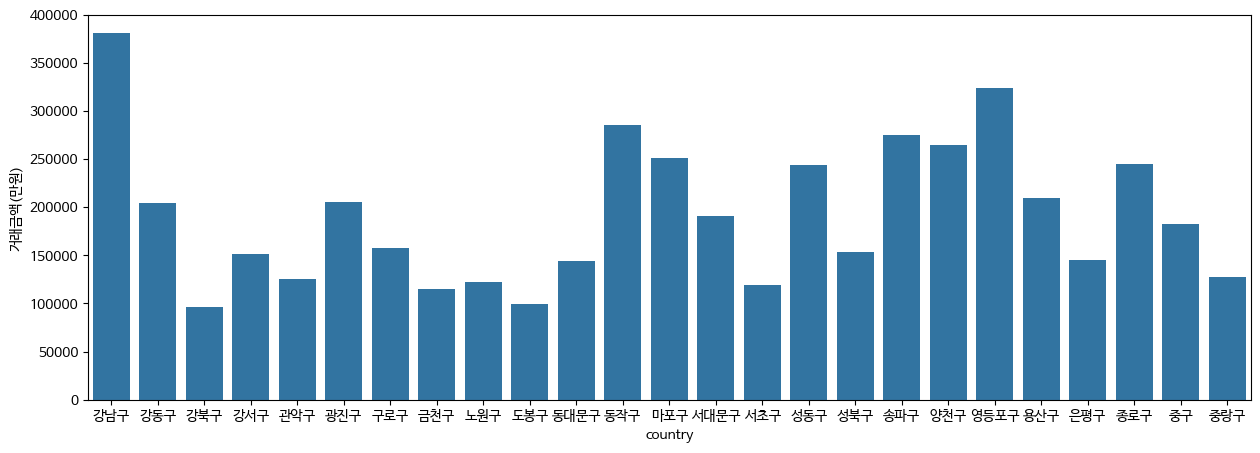

In [80]:
plt.figure(figsize=(15,5))
sns.barplot(goal_max)
plt.show()

## 면적이  $84 m^2$  이상  $100 m^2$  미만의 아파트들 중에서, 광역시도별 아파트 가격 개수, 평균, 최솟값, 최댓값

In [81]:
# 면적이  $84 m^2$  이상  $100 m^2$  미만의 아파트들 구하기
apt_space = apt[(apt['전용면적'] >= 84) & (apt['전용면적'] < 100)]

In [83]:
# 광역시도별 아파트 가격 개수
space_count = apt_space.groupby(by='province')['거래금액(만원)'].count()

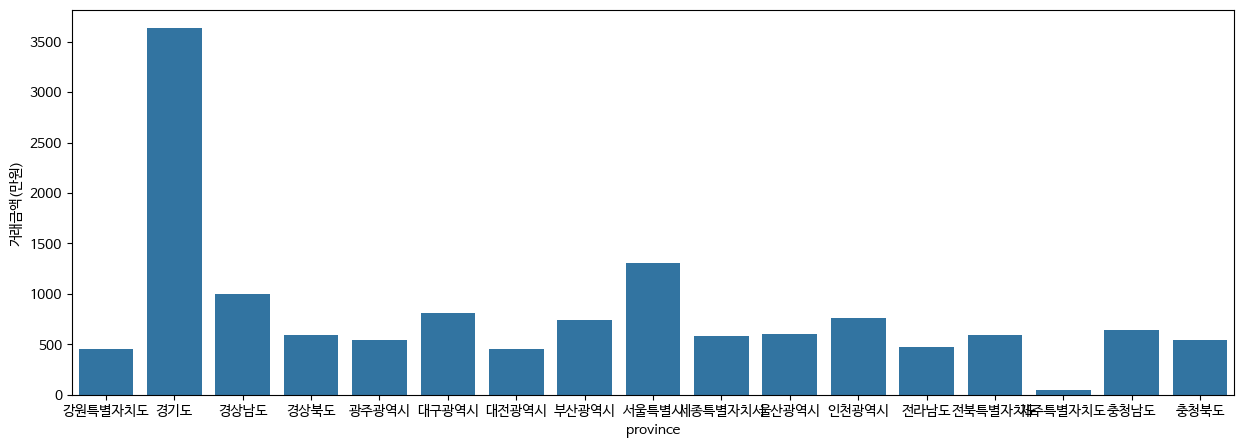

In [84]:
plt.figure(figsize=(15,5))
sns.barplot(space_count)
plt.show()

In [85]:
# 광역시도별 아파트 가격 평균
space_mean = apt_space.groupby(by='province')['거래금액(만원)'].mean()

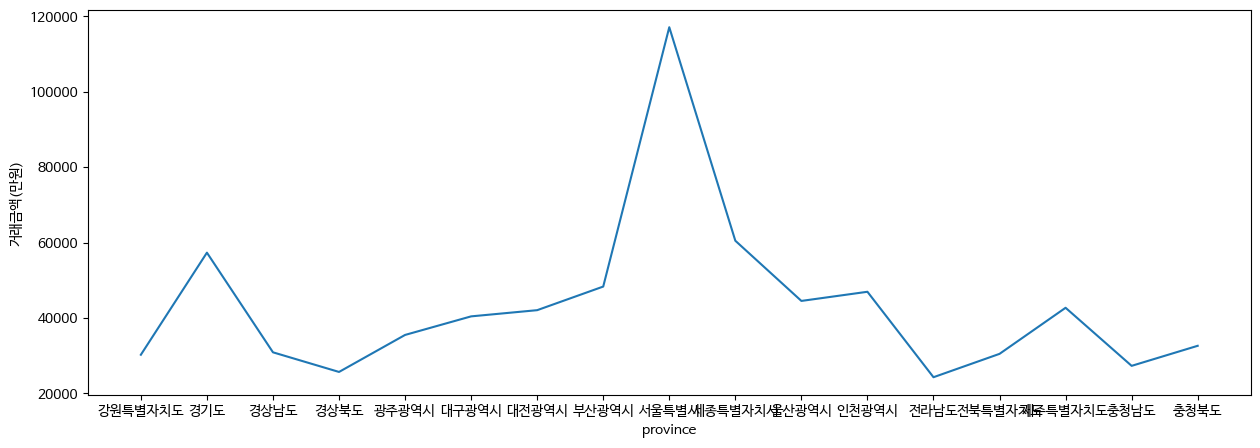

In [86]:
plt.figure(figsize=(15,5))
sns.lineplot(space_mean)
plt.show()

In [87]:
# 광역시도별 아파트 가격 최솟값
space_min = apt_space.groupby(by='province')['거래금액(만원)'].min()

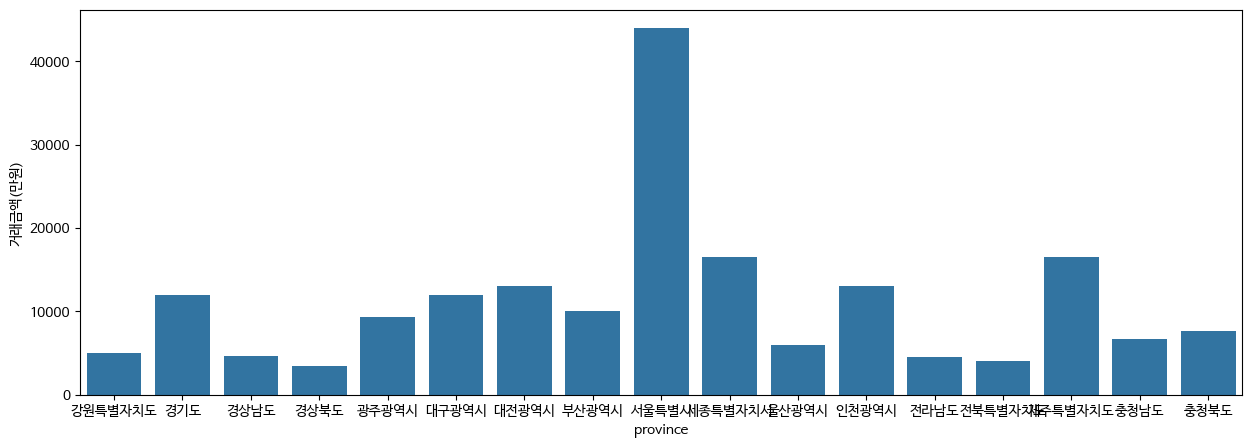

In [88]:
plt.figure(figsize=(15,5))
sns.barplot(space_min)
plt.show()

In [89]:
# 광역시도별 아파트 가격 최댓값
space_max = apt_space.groupby(by='province')['거래금액(만원)'].max()

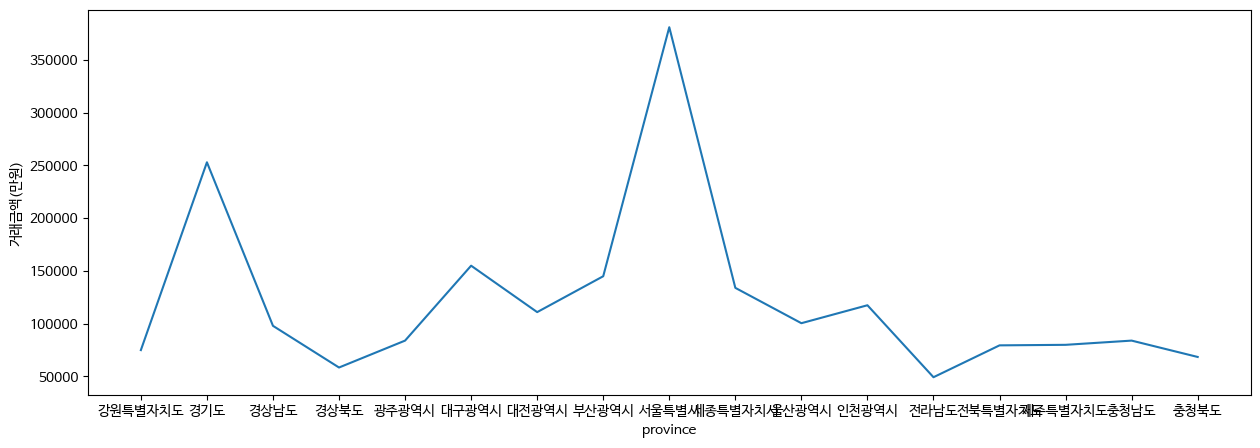

In [90]:
plt.figure(figsize=(15,5))
sns.lineplot(space_max)
plt.show()

### 결과를 평균의 내림차순으로 정렬해서 출력

In [92]:
# mean_ascend_f = apt_space.sort_values('거래금액(만원)', ascending=False)
# mean_ascend_f.head()
apt_space['거래금액(만원)'].mean()

np.float64(50266.97235925711)

### 결과를 최댓값의 내림차순으로 정렬해서 출력

In [94]:
mean_ascend_f = apt_space.sort_values('거래금액(만원)', ascending=False)
mean_ascend_f.head()

,NO,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액(만원),...,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,province,country,year,month
24620,24621,서울특별시 강남구 압구정동,490,490,0,한양1차(영동한양),91.210,202504,10,381000,...,1977,압구정로 321,NaT,직거래,NaN,NaT,서울특별시,강남구,2025,4
12931,12932,서울특별시 강남구 개포동,1281,1281,0,디에이치아너힐즈,84.357,202504,18,350000,...,2019,삼성로 11,NaT,중개거래,서울 강남구,NaT,서울특별시,강남구,2025,4
32977,32978,서울특별시 영등포구 여의도동,525,525,0,브라이튼여의도,84.132,202504,3,324000,...,2023,국제금융로 39,NaT,중개거래,서울 영등포구,NaT,서울특별시,영등포구,2025,4
36551,36552,서울특별시 강남구 대치동,65,65,0,쌍용대치2,84.490,202504,1,312000,...,1983,영동대로 220,NaT,중개거래,서울 강남구,NaT,서울특별시,강남구,2025,4
9233,9234,서울특별시 강남구 삼성동,16-2,16,2,삼성동힐스테이트 1단지,84.236,202504,21,310000,...,2008,학동로68길 29,NaT,중개거래,서울 강남구,NaT,서울특별시,강남구,2025,4


### 결과를 최솟값의 오름차순으로 정렬해서 출력

# 서울특별시 아파트 가격의 최솟값, 최댓값, 평균이 매우 높게 상승되어 있음
# 전반적으로 서울 모든 지역의 아파트 가격이 높은 것인지 특정 지역에만 몰려 있는지 확인

In [96]:
seoul_mean = seoul.groupby('country')['거래금액(만원)'].mean()

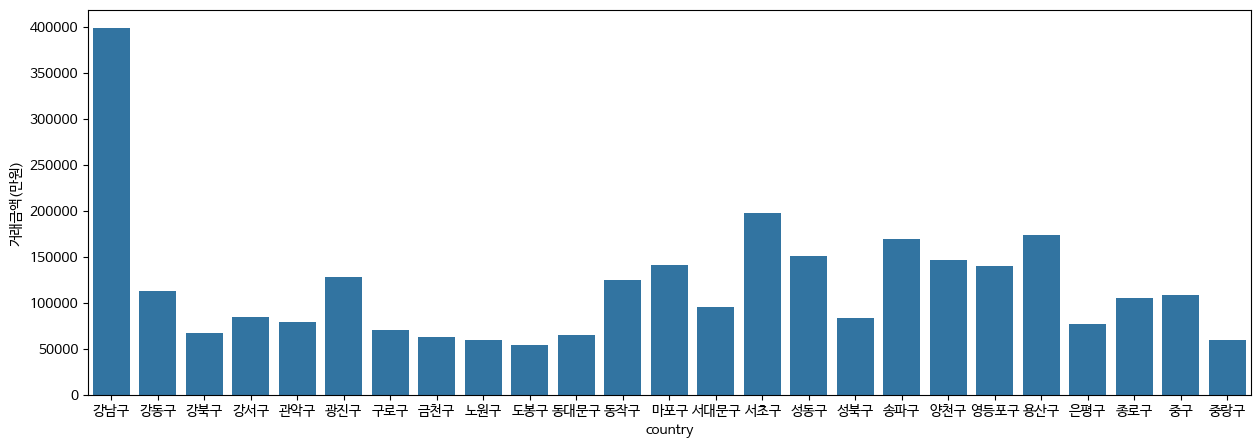

In [97]:
plt.figure(figsize=(15,5))
sns.barplot(seoul_mean)
plt.show()

강남구에만 아파트 가격의 평균이 매우 높으며 그다음으로는 서초구, 요안구, 송파구 순서지만 비슷한 수준으로 보여짐 (200,000)만원

그렇다면 다른 지역의 평균이나 최댓값도 이와 비슷한 지 확인

In [98]:
not_seoul = apt[~(apt.province == '서울특별시')]
not_seoul_mean = not_seoul.groupby('country')['거래금액(만원)'].mean()

In [99]:
not_seoul_mean.sort_values(ascending=False)

,거래금액(만원)
country,
과천시,194803.392857
성남시,112483.646934
하남시,90988.541667
나성동,78109.523810
어진동,77696.551724
...,...
정선군,7067.857143
봉화군,6600.000000
전의면,6600.000000


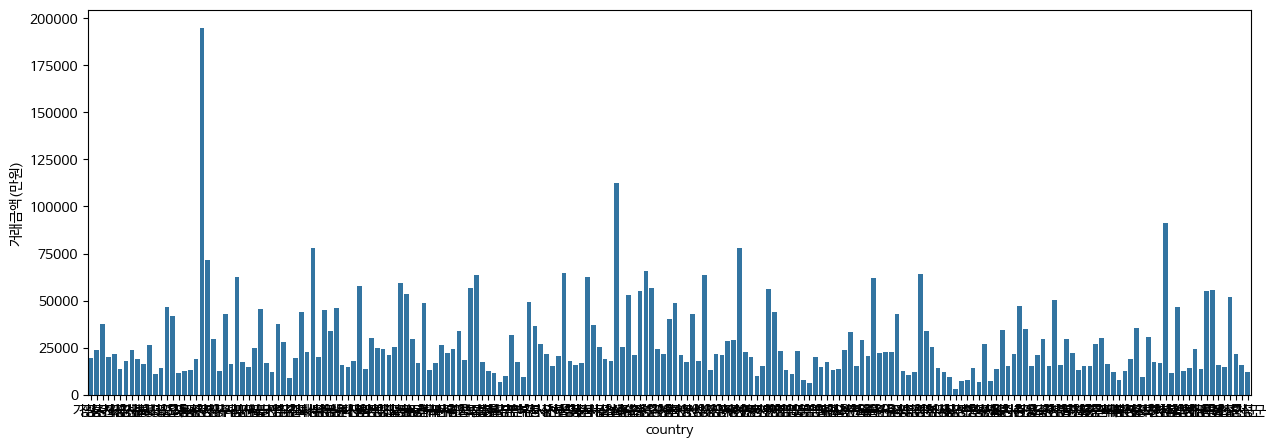

In [100]:
plt.figure(figsize=(15,5))
sns.barplot(not_seoul_mean)
plt.show()

확인해 봤을 때 과천시가 19,4803(만원), 성남시가 112,483(만원), 하남시가 90,988(만원) 순서로 많습니다.

그렇지만 서울특별시와 비교해봤을때 절반에 못 미치는 가격으로 결국 전국적으로 살펴봐도 서울의 아파트 가격이 매우 높게 형성되어 있고(평균적으로) 타 지역의 일부 아파트 가격이 높아보이지만 서울과 비교해보면 서초구, 용산구와 비슷한 수준으로 그 수도 몇 개 되지 않으며 일반적으로 살펴보면 서울의 아파트 가격 평균이 높게 형성되어 있음을 확인할 수 있습니다.

# 전용면적에 따른 거래금액의 차이가 있는지, 거래 유형이 어떻게 이루어지는지 확인

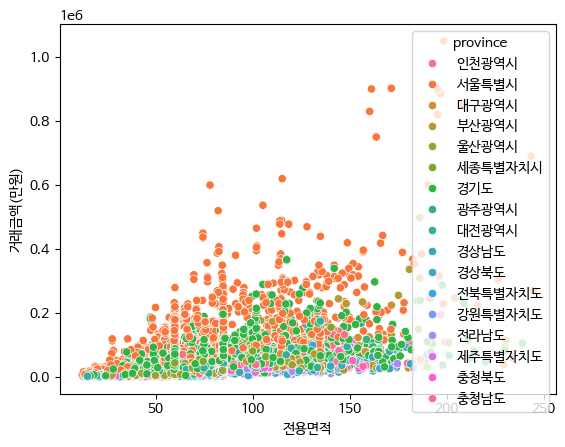

In [101]:
# 전용면적, 거래금액(만원)
# apt.groupby(by=['전용면적'])['거래금액(만원)'].
sns.scatterplot(data=apt, x='전용면적', y='거래금액(만원)', hue='province')
plt.show()

인천광역시, 서울특별시, 대구광역시, 부산광역시, 울산광역시, 세종특별자치시, 경기도, 광주광역시, 대전광역시, 경상남도, 경상북도, 전북특별자치도, 강원특별자치도, 전라남도, 제주특별자치도, 충청북도, 충청남도

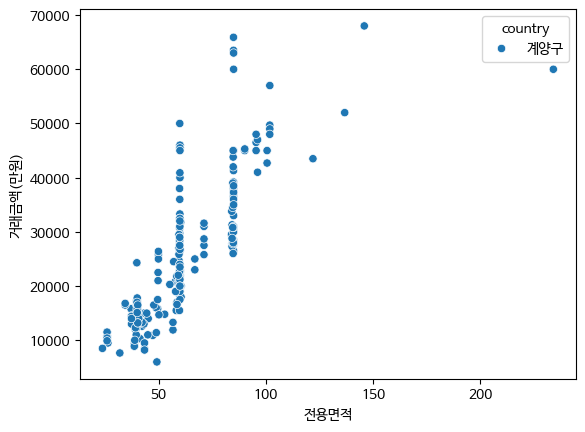

In [102]:
# 인천지역의 전용면적 별 거래금액
incheon = apt[apt.province == '인천광역시']
incheon = apt[(apt.province == '인천광역시') & (apt.country == '남동구')]
incheon = apt[(apt.province == '인천광역시') & (apt.country == '부평구')]
incheon = apt[(apt.province == '인천광역시') & (apt.country == '동구')]
incheon = apt[(apt.province == '인천광역시') & (apt.country == '계양구')]
sns.scatterplot(data=incheon, x='전용면적', y='거래금액(만원)', hue='country')
plt.show()

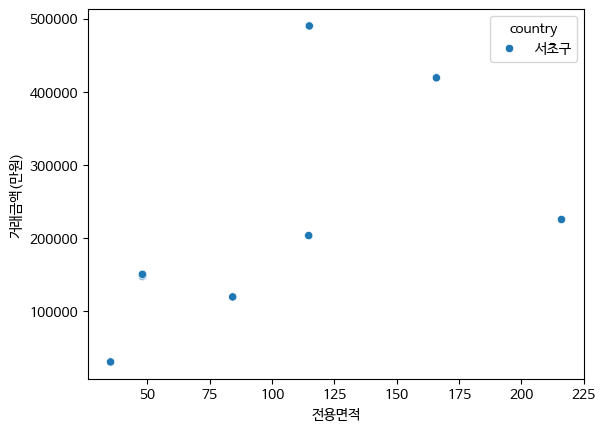

In [103]:
# 서울의 전용면적 별 거래금액
seoul = apt[apt.province == '서울특별시']
seoul = apt[(apt.province == '서울특별시') & (apt.country == '성동구')]
seoul = apt[(apt.province == '서울특별시') & (apt.country == '강남구')]
seoul = apt[(apt.province == '서울특별시') & (apt.country == '서초구')]
sns.scatterplot(data=seoul, x='전용면적', y='거래금액(만원)', hue='country')
plt.show()

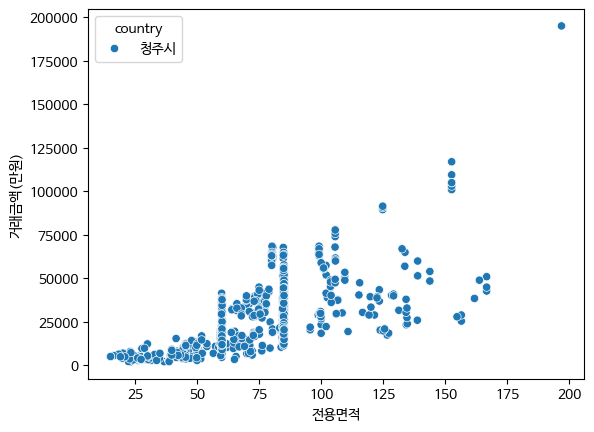

In [104]:
# 충청북도 전용면적 별 거래금액
north_chung = apt[apt.province == '충청북도']
north_chung = apt[(apt.province == '충청북도') & (apt.country == '청주시')]
# north_chung = apt[(apt.province == '충청북도') & (apt.country == '충주시')]
# north_chung = apt[(apt.province == '충청북도') & (apt.country == '단양군')]
sns.scatterplot(data=north_chung, x='전용면적', y='거래금액(만원)', hue='country')
plt.show()

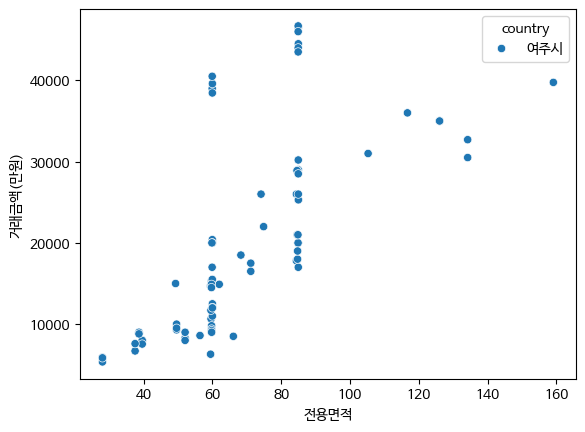

In [105]:
# 경기도 전용면적 별 거래금액
gunggido = apt[apt.province == '경기도']
gunggido = apt[(apt.province == '경기도') & (apt.country == '평택시')]
gunggido = apt[(apt.province == '경기도') & (apt.country == '안성시')]
gunggido = apt[(apt.province == '경기도') & (apt.country == '화성시')]
gunggido = apt[(apt.province == '경기도') & (apt.country == '안양시')]
gunggido = apt[(apt.province == '경기도') & (apt.country == '여주시')]
sns.scatterplot(data=gunggido, x='전용면적', y='거래금액(만원)', hue='country')
plt.show()

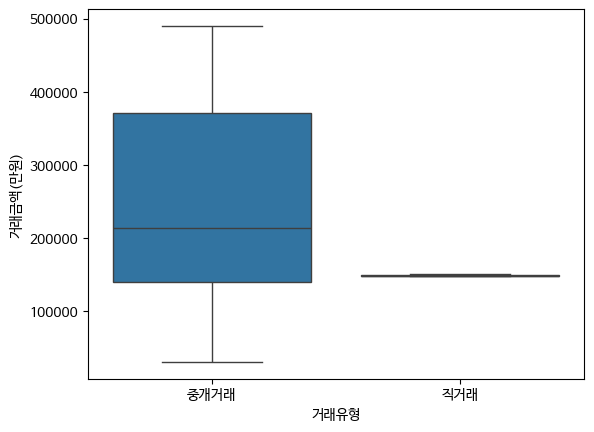

In [106]:
# 서울의 거래 유형 확인
sns.boxplot(data=seoul, x='거래유형', y='거래금액(만원)')
plt.show()

서울의 경우 거의 대부분이 '중개거래'로 이루어지며 '직거래'는 수요가 거의 없음.

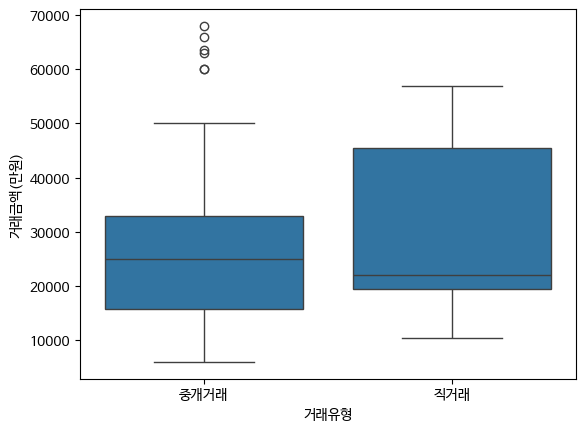

In [107]:
# 인천의 거래 유형 확인
sns.boxplot(data=incheon, x='거래유형', y='거래금액(만원)')
plt.show()

인천의 경우 중개거래와 직거래 모두 수요가 있이며 직거래의 경우가 금액대가 더 높은 경우가 많은것으로 보여짐

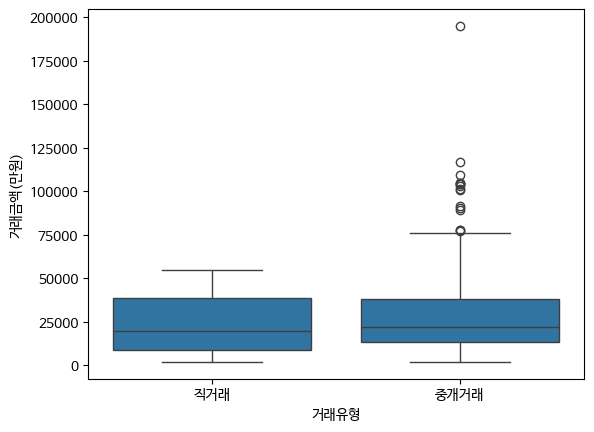

In [108]:
# 충청북도 거래 유형 확인
sns.boxplot(data=north_chung, x='거래유형', y='거래금액(만원)')
plt.show()

충청북도의 경우 직거래와 중개거래의 수요는 비슷함. 다만 중개거래의 경우 간혹 비정상적으로 높은 금액으로 거래가 이루어지기도 함. 직거래는 그런 경우가 없음.

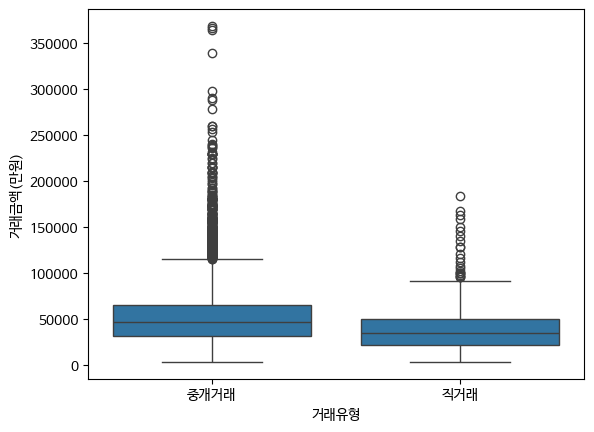

In [109]:
# 경기도 거래 유형 확인
gunggido = apt[apt.province == '경기도']
sns.boxplot(data=gunggido, x='거래유형', y='거래금액(만원)')
plt.show()

경기도도 중개거래와 직거래의 50%는 비슷한 거래금액으로 진행되지만 극단적인 경우의 값(15억을 넘어가는) 거래는 '중개거래'가 압도적으로 많음

# 건축년도별 전용면적의 차이

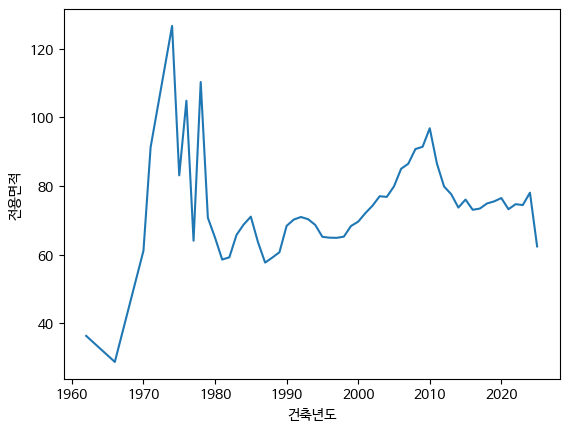

In [110]:
sns.lineplot(data=apt, x='건축년도', y='전용면적', errorbar=None)
plt.show()

In [111]:
apt['전용면적'].describe()

,전용면적
count,36974.000000
mean,73.912814
std,22.468251
min,12.210000
25%,59.840000
50%,75.532800
75%,84.950000
max,244.470000
